In [1]:
import numpy as np
import pandas as pd

1. ดึงข้อมูลมา CSV มาทำให้เป็น Data Frame.

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,date,sensor_v2.agg_tag,sensor_v2.avg_speed
0,11/4/2019 0:00,1,76.664726
1,11/4/2019 0:00,1,99.527657
2,11/4/2019 0:00,1,97.983643
3,11/4/2019 0:01,1,76.575317
4,11/4/2019 0:01,1,90.508705


2. แบ่งข้อมูล Date เป็น day และ time

In [4]:
new = data.date.str.split(' ',n=1, expand=True)

In [5]:
data['day'] = new[0]
data['time'] = new[1]

In [6]:
data = data[data['day'].str.contains('11/5/2019')]

In [7]:
data.head()

,date,sensor_v2.agg_tag,sensor_v2.avg_speed,day,time
3647,11/5/2019 0:00,1,98.894310,11/5/2019,0:00
3648,11/5/2019 0:01,1,101.238907,11/5/2019,0:01
3649,11/5/2019 0:02,1,81.926285,11/5/2019,0:02
3650,11/5/2019 0:02,1,89.578957,11/5/2019,0:02
3651,11/5/2019 0:02,1,111.653862,11/5/2019,0:02


3. จัดข้อมูล ที่เป็น tag และ time เดียวกัน แล้วหาค่าเฉลี่ย

In [8]:
arv_data = data.groupby(['sensor_v2.agg_tag','time']).mean()

In [9]:
#arv_data.to_csv('arv_data.csv')

In [10]:
arv_data = pd.read_csv('arv_data')

In [11]:
arv_data.head()

,sensor_v2.agg_tag,time,sensor_v2.avg_speed
0,1,0:00,98.894310
1,1,0:01,101.238907
2,1,0:02,94.386368
3,1,0:03,80.918354
4,1,0:04,103.639690


4.นำคอลัมน์ Date ที่เป็นข้อมูลประเภท string มาแปลงให้เป็นประเภท time

In [12]:
time = data['date'].tolist()

In [13]:
from datetime import datetime


In [14]:
date_time=[] #start at here!!!!
for t in  range(len(time)):
    datetime_str = time[t]

    datetime_object = datetime.strptime(datetime_str, '%m/%d/%Y %H:%M')

    date_time.append(datetime_object)


In [15]:
data['date_time'] = date_time

In [16]:
data=data.sort_values(by=['sensor_v2.agg_tag','date_time'])

5. นำข้อมูลมาจัดกลุ่มด้วย ตัวแปร tag กับ date_time แล้วหาค่า เฉลี่ย

In [17]:
data = data.groupby(['sensor_v2.agg_tag','date_time']).mean()

In [18]:
data['sensor_v2.avg_speed'][1]

date_time
2019-11-05 00:00:00     98.894310
2019-11-05 00:01:00    101.238907
2019-11-05 00:02:00     94.386368
2019-11-05 00:03:00     80.918354
2019-11-05 00:04:00    103.639690
                          ...    
2019-11-05 23:55:00    104.823855
2019-11-05 23:56:00    102.021946
2019-11-05 23:57:00    119.672818
2019-11-05 23:58:00    110.031342
2019-11-05 23:59:00    108.623657
Name: sensor_v2.avg_speed, Length: 1392, dtype: float64

6. สร้าง Dataframe ว่าง ด้วย index times และ column sensor

In [19]:
times = pd.date_range("2019-11-05 00:00:00", "2019-11-05 23:59:00", freq="1min")   

In [31]:
#df_None = pd.DataFrame(columns=['sensor{}'.format(i) for i in range(1,34)], index=times)
df_None = pd.DataFrame(index=times)

In [34]:
df_None

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22
2019-11-05 00:00:00,98.894310,126.933681,94.689281,107.328125,NaN,84.786873,96.313023,99.578835,85.912354,100.292511,...,95.543915,86.185856,99.401596,78.881619,83.114784,93.060748,100.478717,105.168165,103.595942,96.158620
2019-11-05 00:01:00,101.238907,120.542236,109.287640,99.872089,90.789818,92.261373,85.954595,110.415169,90.073643,94.676312,...,74.656012,97.296799,109.488636,91.452306,103.764979,108.464836,110.584831,110.188009,95.428902,91.697350
2019-11-05 00:02:00,94.386368,102.647774,87.449806,86.383228,NaN,83.691719,66.709484,106.517502,90.534679,98.237579,...,88.185567,101.224186,92.785136,84.924156,83.138504,113.091708,112.883886,92.486628,113.592051,115.223778
2019-11-05 00:03:00,80.918354,96.385818,91.669785,91.212303,80.765694,86.695862,87.335812,98.658936,89.150604,100.905117,...,89.059288,85.174328,104.964650,89.646152,105.344521,133.598927,84.535585,79.591124,101.083019,98.223356
2019-11-05 00:04:00,103.639690,84.957104,92.271114,103.514515,NaN,94.097865,88.365051,98.633747,80.178834,98.155011,...,95.166771,106.742462,93.910664,86.232574,108.588552,107.698845,105.207812,104.379168,103.132718,83.305611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-05 23:55:00,104.823855,105.322891,95.907168,96.504651,84.090721,86.618492,89.288040,86.331571,88.312988,79.740999,...,91.467499,91.361427,96.704737,82.959712,95.283223,90.790451,93.833889,92.721672,98.385426,104.665181
2019-11-05 23:56:00,102.021946,98.962479,107.990944,105.459335,93.246788,93.820023,85.808140,101.461563,98.114604,95.820727,...,87.490662,92.730835,88.656494,81.314148,95.221728,96.445271,110.470670,103.192192,102.902664,96.177048
2019-11-05 23:57:00,119.672818,101.145042,97.826714,75.299164,108.946407,68.251909,87.708115,98.633376,90.211029,94.708387,...,87.849693,99.203082,91.973076,79.943649,95.694438,102.233701,106.423113,106.393517,111.575829,97.182528
2019-11-05 23:58:00,110.031342,109.810913,102.201466,118.639923,83.359230,97.746389,99.749603,102.876930,86.028639,88.762519,...,83.600952,90.495196,96.875676,88.102142,87.697271,95.177757,84.209980,104.268238,90.200546,68.615312


7. เติมข้อมูลที่เรามี ใน Dataframe ที่ว่างอยู่ด้วยข้อมูลที่มี

In [35]:
for i in range(1,34):
    df_None[f'sensor{i}'] = data['sensor_v2.avg_speed'][i]

KeyError: 23

In [29]:
df_None['sensor14']

2019-11-05 00:00:00     86.185856
2019-11-05 00:01:00     97.296799
2019-11-05 00:02:00    101.224186
2019-11-05 00:03:00     85.174328
2019-11-05 00:04:00    106.742462
                          ...    
2019-11-05 23:55:00     91.361427
2019-11-05 23:56:00     92.730835
2019-11-05 23:57:00     99.203082
2019-11-05 23:58:00     90.495196
2019-11-05 23:59:00           NaN
Freq: T, Name: sensor14, Length: 1440, dtype: float64

8. พลอต กราฟ 

In [24]:
df_None.to_csv('plotData.csv')

In [25]:
Z = df_None.to_numpy().transpose()

In [26]:
import matplotlib.pyplot as plt

In [27]:
y = np.arange(1,34)
x = np.arange(1440)

In [28]:
X, Y = np.meshgrid(x,y)

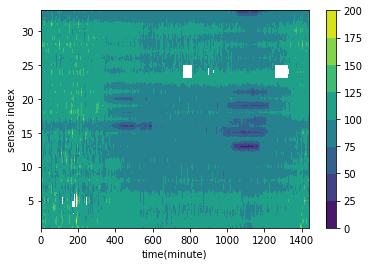

In [29]:
fig = plt.figure()
ax1 = plt.contourf(X, Y, Z)
plt.colorbar(ax1)
plt.ylabel('sensor index')
plt.xlabel('time(minute)')
plt.savefig('growth24.png')
plt.show()